In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from langdetect import detect

 **This project examines the Coursera dataset to explore the factors that affect course enrollment. It focuses on understanding how course ratings, difficulty, and certificate types influence the number of students who enroll. The goal is to identify key trends and provide actionable insights based on the data.**

<!-- -->

## Uploading the Data

In [8]:
coursea_datapath= ('/workspaces/157886021/CSV_FILES/coursea_data.csv')
coursea = pd.read_csv(coursea_datapath)
df = pd.DataFrame(coursea)
df.sort_values(by='course_id', ascending=True, inplace=True)
df.set_index('course_id', inplace=True)
def convert_to_number(value):
        if 'k' in value:
            return int(float(value.replace('k', '')) * 1_000) #galima naudot e vietoj 1000
        elif 'm' in value:
            return int(float(value.replace('m', '')) * 1_000_000)

df['course_students_enrolled'] = df['course_students_enrolled'].apply(convert_to_number)
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
course_id,,,,,,
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480000
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310000
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350000


<!-- -->

## Data Cleaning

I wanted to check if there is any nulls in the rows:

In [9]:
missing_values = df.isnull().sum()
print(missing_values)

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64


Checked if there is any duplicate rows:

In [10]:
duplicates = df.duplicated().sum()
print(f"There are {duplicates} duplicate rows in the dataset.")

There are 0 duplicate rows in the dataset.


<!-- -->

## Data Analysis

**In this part we will calculate the counts and averages for the certificate_type and course_difficulty columns, then create a boxplot to detect and analyze any outliers in the dataset. Plot the relevant data**

This chart illustrates the distribution of certificate types, showing that the majority are categorized as 'COURSE' certificates.

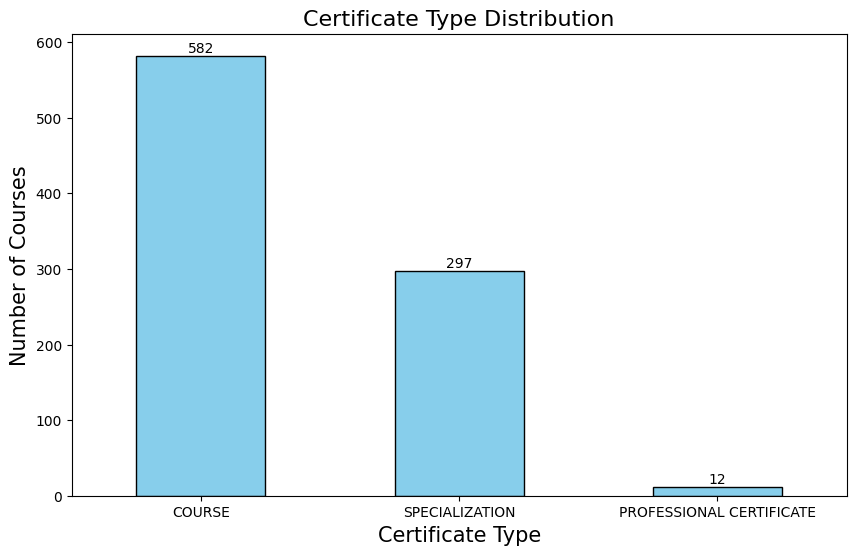

In [11]:
certificate_type_counts = df['course_Certificate_type'].value_counts()
plt.figure(figsize=(10, 6))
certificate_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Certificate Type Distribution', fontsize=16)
plt.xlabel('Certificate Type', fontsize=15)
plt.ylabel('Number of Courses', fontsize=15)
plt.xticks(rotation=360)

for bar in plt.gca().patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        int(bar.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )

In [12]:

average_ratings = df.groupby('course_Certificate_type')['course_rating'].mean()
print(average_ratings)

course_Certificate_type
COURSE                      4.707045
PROFESSIONAL CERTIFICATE    4.700000
SPECIALIZATION              4.618182
Name: course_rating, dtype: float64


The box plot revealed the distribution of ratings across different certificate types, highlighting their means and identifying any outliers. From our earlier analysis, it's evident that there is a significant bias in the distribution. Consequently, the average rating of courses rated at 4.7 carries more weight than that of courses with professional certificates.

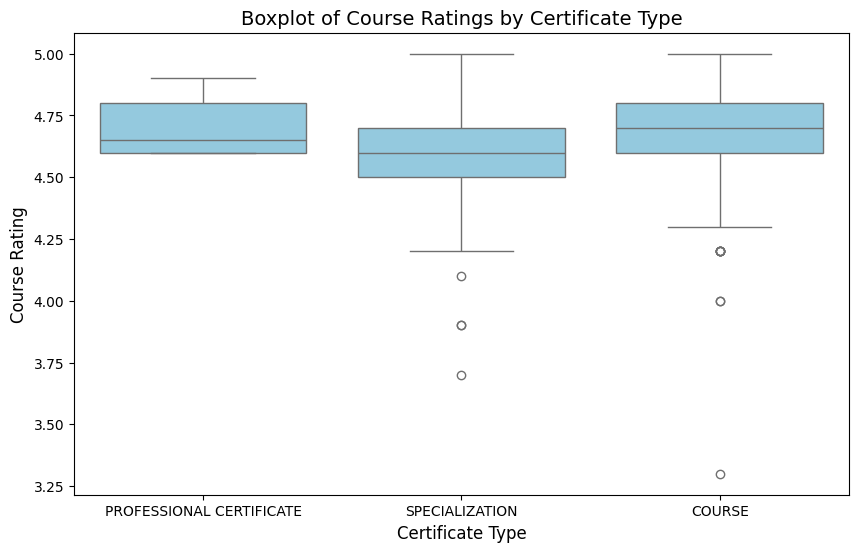

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='course_Certificate_type', y='course_rating', data=df, color='skyblue')
plt.title('Boxplot of Course Ratings by Certificate Type', fontsize=14)
plt.xlabel('Certificate Type', fontsize=12)
plt.ylabel('Course Rating', fontsize=12)
plt.xticks(rotation=360)
plt.show()

## Why is there such a significant difference between Course Certificates and Professional Certificates?

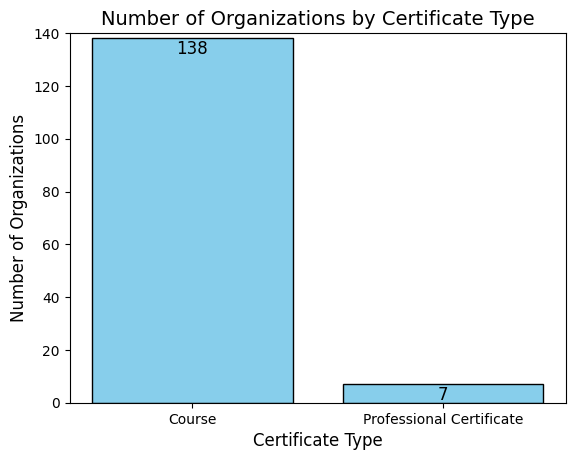

In [14]:
course_certificates = df[df['course_Certificate_type'] == 'COURSE']
unique_organizations_course = course_certificates['course_organization'].nunique()

professional_certificates = df[df['course_Certificate_type'] == 'PROFESSIONAL CERTIFICATE']
unique_organizations_professional = professional_certificates['course_organization'].nunique()

certificate_types = ['Course', 'Professional Certificate']
organization_counts = [unique_organizations_course, unique_organizations_professional]

bars = plt.bar(certificate_types, organization_counts, color=['skyblue', 'skyblue'], edgecolor='black')

for bar, count in zip(bars, organization_counts):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() - 0.5,
             str(count),
             ha='center', va='top',
             color='black',
             fontsize=12)

plt.title('Number of Organizations by Certificate Type', fontsize=14)
plt.xlabel('Certificate Type', fontsize=12)
plt.ylabel('Number of Organizations', fontsize=12)
plt.ylim(0, max(organization_counts) + 2)
plt.show()

We conclude that significantly fewer organizations offer professional certificates compared to course certificates.

<!-- -->

This chart illustrates the distribution of certificate difficulty, showing that the majority of certificates are 'Bigginer' level.

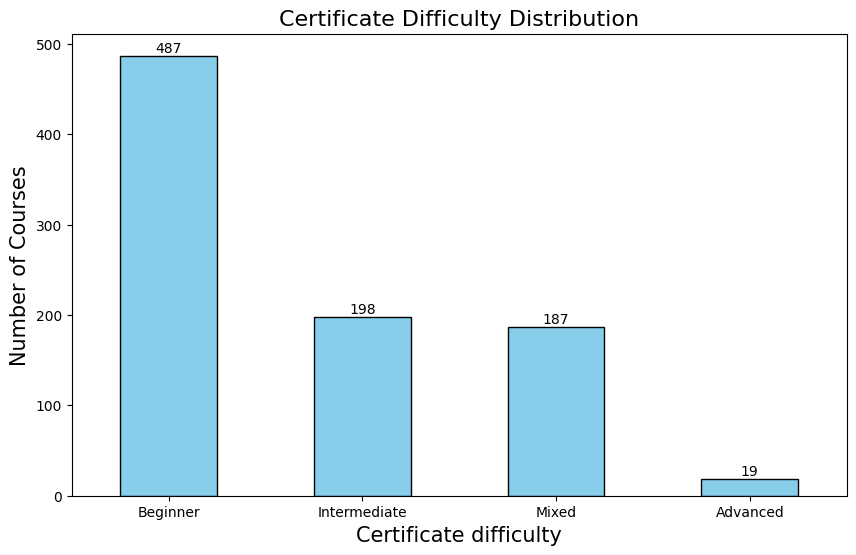

In [15]:
course_difficulty_counts = df['course_difficulty'].value_counts()
plt.figure(figsize=(10, 6))
course_difficulty_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Certificate Difficulty Distribution', fontsize=16)
plt.xlabel('Certificate difficulty', fontsize=15)
plt.ylabel('Number of Courses', fontsize=15)
plt.xticks(rotation=360)

for bar in plt.gca().patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        int(bar.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )

In [16]:
average_ratings = df.groupby('course_difficulty')['course_rating'].mean()
print(average_ratings)

course_difficulty
Advanced        4.600000
Beginner        4.680903
Intermediate    4.646465
Mixed           4.708556
Name: course_rating, dtype: float64


The box plot revealed the distribution of ratings across different certificate difficulties, highlighting their means and identifying any outliers. From our earlier analysis, it's evident that there is a significant bias in the distribution. Consequently, the average rating of Beginner level courses at 4.68 carries more weight than that of courses with mixed level courses.

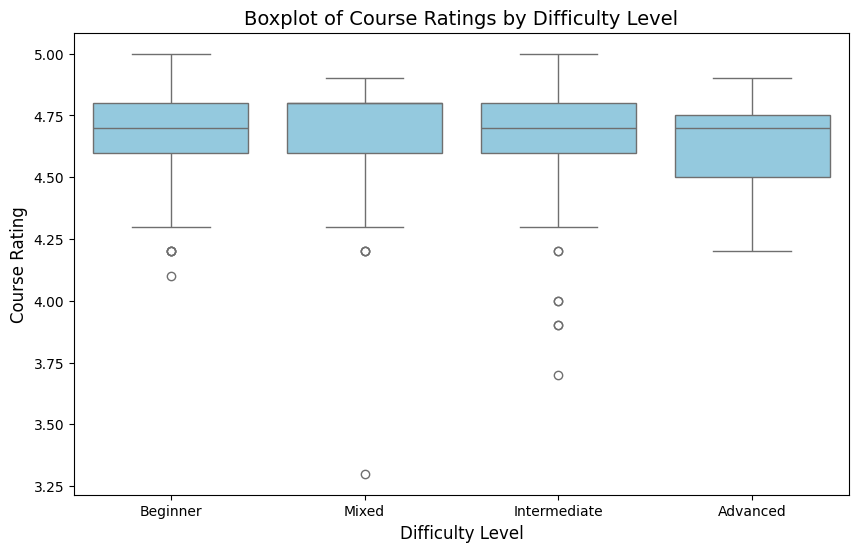

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='course_difficulty', y='course_rating', data=df, color='skyblue')
plt.title('Boxplot of Course Ratings by Difficulty Level', fontsize=14)
plt.xlabel('Difficulty Level', fontsize=12)
plt.ylabel('Course Rating', fontsize=12)
plt.xticks(rotation=360)
plt.show()

## Why is there such a significant difference between Beginner-level courses and Advanced-level courses?

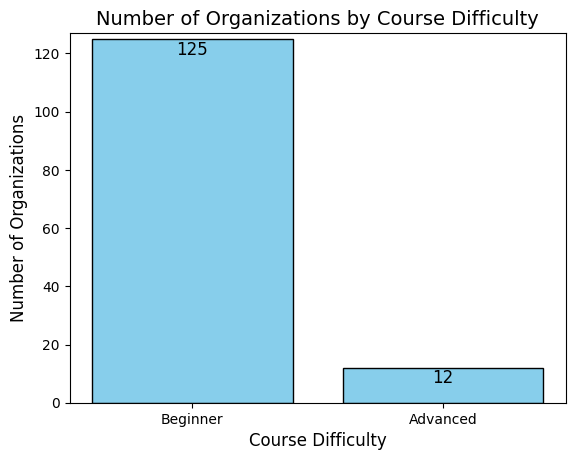

In [18]:
beginner_courses = df[df['course_difficulty'] == 'Beginner']
unique_organizations_beginner = beginner_courses['course_organization'].nunique()

advanced_courses = df[df['course_difficulty'] == 'Advanced']
unique_organizations_advanced = advanced_courses['course_organization'].nunique()

difficulty_levels = ['Beginner', 'Advanced']
organization_counts = [unique_organizations_beginner, unique_organizations_advanced]

bars = plt.bar(difficulty_levels, organization_counts, color=['skyblue', 'skyblue'], edgecolor='black')

for bar, count in zip(bars, organization_counts):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() - 0.5,
             str(count),
             ha='center', va='top',
             color='black',
             fontsize=12)


plt.title('Number of Organizations by Course Difficulty', fontsize=14)
plt.xlabel('Course Difficulty', fontsize=12)
plt.ylabel('Number of Organizations', fontsize=12)
plt.ylim(0, max(organization_counts) + 2)
plt.show()

We conclude that significantly fewer organizations offer courses at an advanced difficulty level compared to beginner-level courses.

<!-- -->

## To uncover relevant insights, we utilized Plotly to graph the average enrollment across course difficulties, certificate types, and enrollment by rating

In [20]:
course_difficulty_avgs = df.groupby('course_difficulty')['course_students_enrolled'].mean().reset_index()

difficulty_sorted_avgs = course_difficulty_avgs.sort_values(by='course_students_enrolled')

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=difficulty_sorted_avgs['course_difficulty'],
        y=difficulty_sorted_avgs['course_students_enrolled'],
        marker_color=['grey', 'grey', 'grey', 'skyblue'],
    )
)

fig.update_layout(
    title='Course Difficulty Distribution (Average Students Enrolled)',
    xaxis_title='Course Difficulty',
    yaxis_title='Average Students Enrolled',
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        showline=True,
        linewidth=1,
        linecolor='black',
    ),
    yaxis=dict(
        showline=True,
        linewidth=1,
        linecolor='black'
    )
)
fig

In [22]:
certificate_type_avgs = df.groupby('course_Certificate_type')['course_students_enrolled'].mean().reset_index()

certificate_sorted_avgs = certificate_type_avgs.sort_values(by='course_students_enrolled')

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=certificate_sorted_avgs['course_Certificate_type'],
        y=certificate_sorted_avgs['course_students_enrolled'],
        marker_color=['grey', 'grey', 'skyblue']
    )
)

fig.update_layout(
    title='Course Type Distribution (Average Students Enrolled)',
    xaxis_title='Certificate Type',
    yaxis_title='Average Students Enrolled',
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        showline=True,
        linewidth=1,
        linecolor='black',
    ),
    yaxis=dict(
        showline=True,
        linewidth=1,
        linecolor='black',
    )
)
fig

In [24]:
rating_avgs = df.groupby('course_rating')['course_students_enrolled'].mean().reset_index()

rating_avgs = rating_avgs.sort_values(by='course_students_enrolled')

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=rating_avgs['course_rating'],
        y=rating_avgs['course_students_enrolled'],
        marker_color=['grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey',
                       'grey', 'grey', 'grey', 'grey', 'grey', 'skyblue', 'grey', 'grey']
    )
)

fig.update_layout(
    title='Course Rating Distribution (Average Students Enrolled)',
    xaxis_title='Rating Level',
    yaxis_title='Average Students Enrolled',
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        showline=True,
        linewidth=1,
        linecolor='black'
    ),
    yaxis=dict(
        showline=True,
        linewidth=1,
        linecolor='black'
    )
)
fig

These graphs clearly demonstrate that organizations can benefit from offering more advanced-level certificates, as the average enrollment is highest for professional certificates and courses with a mixed level of difficulty.

<!-- -->

## Identify the highest and lowest-rated courses and organizations, determine the most and least enrolled courses and organizations, and analyze the correlation between course ratings and enrollments.

In [25]:

max_rating = df['course_rating'].max()


highest_rated_courses = df[df['course_rating'] == max_rating]


max_organizations = highest_rated_courses['course_organization'].unique()
max_course_titles = highest_rated_courses['course_title'].unique()

print(f"The highest rating is: {max_rating}")
print(f"Organizations with the highest rating: {list(max_organizations)}")
print(f"Course titles with the highest rating: {list(max_course_titles)}")

The highest rating is: 5.0
Organizations with the highest rating: ['Imperial College London', 'Universidad Austral']
Course titles with the highest rating: ['Infectious Disease Modelling', 'El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho']


In [26]:
max_enrolled = df['course_students_enrolled'].max()

max_enroll_rows = df[df['course_students_enrolled'] == max_enrolled]

highest_enrollment = max_enroll_rows['course_organization'].unique()
enrollment_course_titles = max_enroll_rows['course_title'].unique()

print(f"The highest enrollment is: {max_enrolled}")
print(f"Organizations with the highest enrollment: {list(highest_enrollment)}")
print(f"Course titles with the highest enrollment: {list(enrollment_course_titles)}")

The highest enrollment is: 3200000
Organizations with the highest enrollment: ['Stanford University']
Course titles with the highest enrollment: ['Machine Learning']


In [27]:

min_rating = df['course_rating'].min()

min_rows = df[df['course_rating'] == min_rating]

min_organizations = min_rows['course_organization'].unique()
min_course_titles = min_rows['course_title'].unique()

print(f"The lowest course rating is: {min_rating}")
print(f"Organizations with the lowest-rated courses: {list(min_organizations)}")
print(f"Course titles with the lowest rating: {list(min_course_titles)}")

The lowest course rating is: 3.3
Organizations with the lowest-rated courses: ['The State University of New York']
Course titles with the lowest rating: ['How To Create a Website in a Weekend! (Project-Centered Course)']


In [28]:
min_enrolled = df['course_students_enrolled'].min()

min_enroll_rows = df[df['course_students_enrolled'] == min_enrolled]

lowest_enrollment = min_enroll_rows['course_organization'].unique()
enrollment_course_titles = min_enroll_rows['course_title'].unique()

print(f"The lowest enrollment is: {min_enrolled}")
print(f"Organizations with the lowest enrollment: {list(lowest_enrollment)}")
print(f"Course titles with the lowest enrollment: {list(enrollment_course_titles)}")

The lowest enrollment is: 1500
Organizations with the lowest enrollment: ['Universidad Austral']
Course titles with the lowest enrollment: ['El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho']


One of the highest-rated universities has the lowest enrollment rate. This observation raises an important question: is there a relationship between a university's rating and its enrollment numbers?

<!-- -->

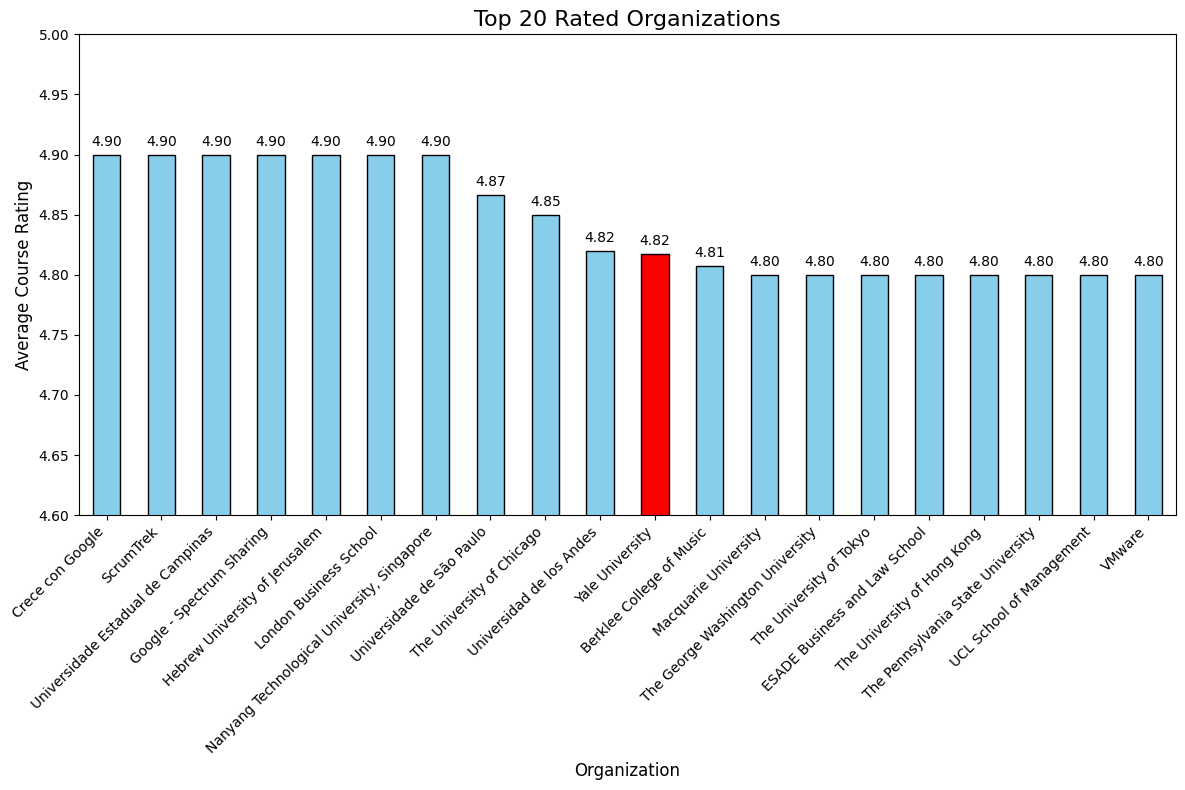

In [29]:
top_organizations = (
    df.groupby('course_organization')['course_rating']
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

for i, bar in enumerate(bars.patches):
    label = top_organizations.index[i]
    if label == 'Yale University':
        bar.set_color('red')

plt.figure(figsize=(12, 8))
bars = top_organizations.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 20 Rated Organizations', fontsize=16)
plt.xlabel('Organization', fontsize=12)
plt.ylabel('Average Course Rating', fontsize=12)
plt.ylim(4.6, 5)
plt.xticks(rotation=45, ha='right', fontsize=10)

for i, bar in enumerate(bars.patches):
    label = top_organizations.index[i]
    if label == 'Yale University':
        bar.set_color('red',)
        bar.set_edgecolor('black')


for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.005,
        f'{bar.get_height():.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

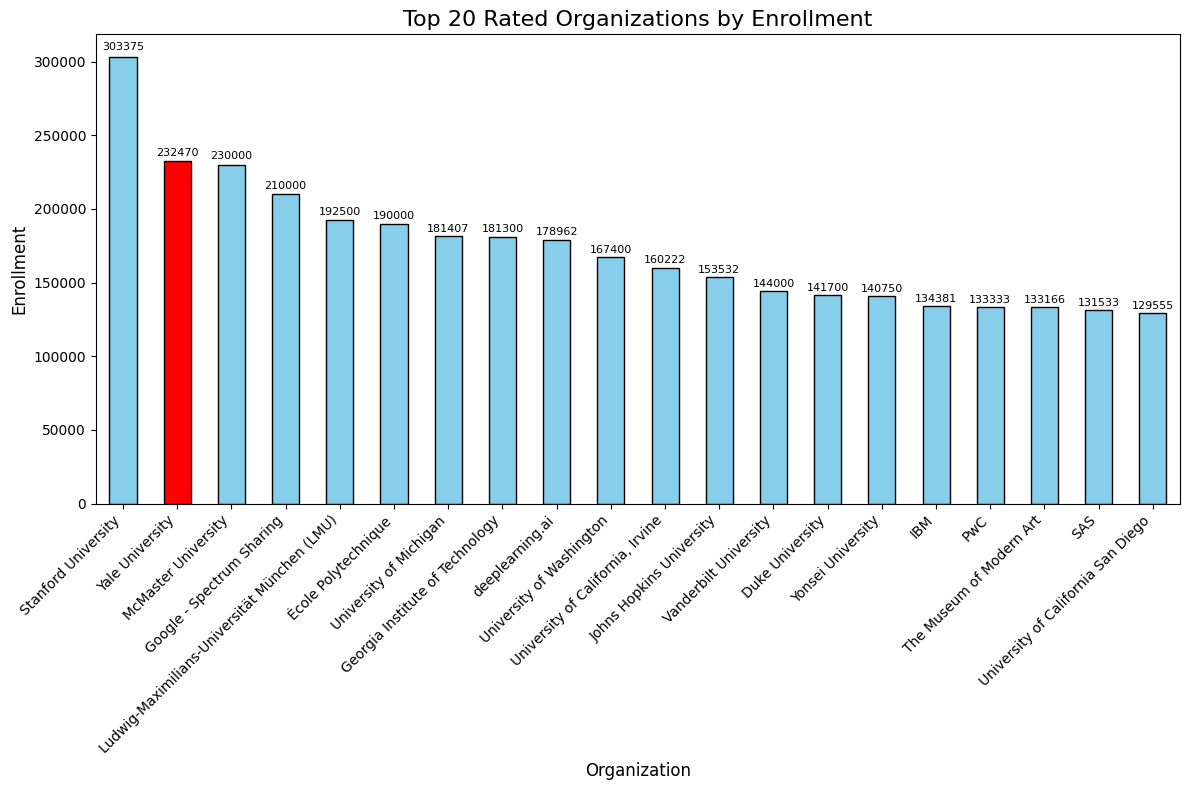

In [30]:
top_organizations = (
    df.groupby('course_organization')['course_students_enrolled']
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

plt.figure(figsize=(12, 8))

bars = top_organizations.plot(kind='bar', color='skyblue', edgecolor='black')


for i, bar in enumerate(bars.patches):
    label = top_organizations.index[i]
    if label == 'Yale University':
        bar.set_color('red',)
        bar.set_edgecolor('black')

for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.01 * bar.get_height(),
        f'{int(bar.get_height())}',
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.title('Top 20 Rated Organizations by Enrollment', fontsize=16)
plt.xlabel('Organization', fontsize=12)
plt.ylabel('Enrollment', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

Only one out of the top 20 organizations overlaps when comparing the highest enrollment and the highest-rated ones. This indicates little to no correlation between the two variables. However, performing a formal correlation analysis could provide further insights.

Correlation: 0.04016400289754342


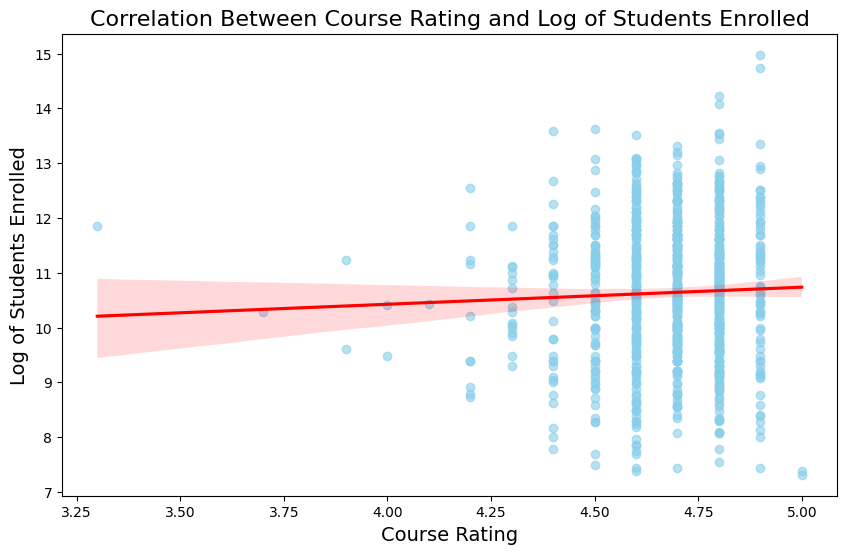

In [33]:
df['Log_course_students_enrolled'] = np.log(df['course_students_enrolled'])

# Compute the correlation with the log-transformed students enrolled
correlation = df['course_rating'].corr(df['Log_course_students_enrolled'])
print(f"Correlation: {correlation}")

# Plot the regression between course rating and log-transformed students enrolled
plt.figure(figsize=(10, 6))
sns.regplot(
    x='course_rating',
    y='Log_course_students_enrolled',  # Use the log-transformed data
    data=df,
    scatter_kws={'color': 'skyblue', 'alpha': 0.6},
    line_kws={'color': 'red'}
)

# Plot title and labels
plt.title('Correlation Between Course Rating and Log of Students Enrolled', fontsize=16)
plt.xlabel('Course Rating', fontsize=14)
plt.ylabel('Log of Students Enrolled', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

A correlation of 0.04 indicates an almost nonexistent positive relationship. Therefore, we can conclude that these variables are not meaningfully related, suggesting that higher ratings do not necessarily attract more students. However, with a larger dataset, a different story might emerge.

## Bonus plot

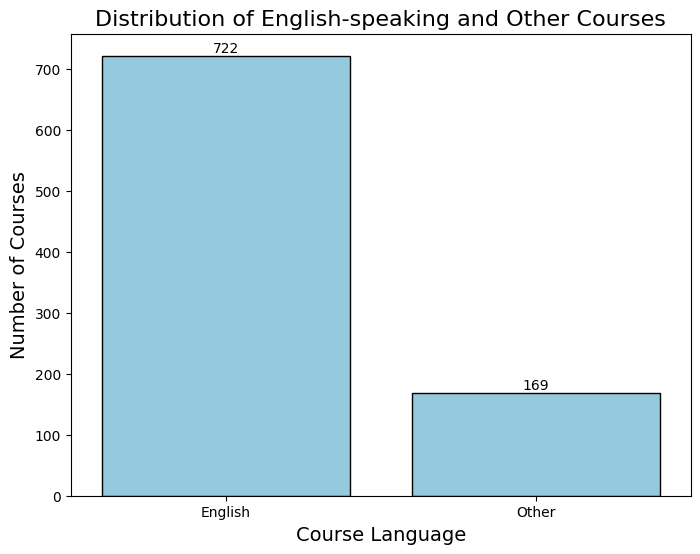

In [34]:
def is_english(course_text):
    try:
        language = detect(course_text)

        if language == 'en':
            return 'English'
        else:
            return 'Other'
    except:
        return 'Unknown'

df['course_language'] = df['course_title'].apply(is_english)

language_counts = df['course_language'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, color='skyblue', edgecolor='black')

plt.title('Distribution of English-speaking and Other Courses', fontsize=16)
plt.xlabel('Course Language', fontsize=14)
plt.ylabel('Number of Courses', fontsize=14)

for bar in plt.gca().patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        int(bar.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )
plt.show()

Our bonus plot reveals that the majority of courses in this dataset are in English. Expanding the dataset to include more courses in other languages could enable new and insightful analyses.


<!-- -->

## Suggestions for Improvement

The analysis could be significantly enhanced with additional data. For instance, including a column like 'course_countries' could provide valuable insights into how course popularity and enrollment rates vary across different regions. Expanding the dataset to include more non-English-speaking courses could further uncover new patterns related to geographic trends, demographic preferences, and regional demand for specific course types or difficulty levels. However, due to the current limitations of the dataset, these hypotheses remain speculative and require further investigation to validate.

## Conclusion

This analysis reveals key trends, such as "COURSE" being the most popular certificate type, with beginner courses having the highest enrollment. Plot analysis using **Plotly** determined that beginner difficulty courses had the highest popularity (39.92M enrollments), while "COURSE" type courses led in total enrollment (51.13M). Courses with a **4.8 rating** had the most popularity (22.34M enrollments). 

There appears to be no significant correlation between course ratings and enrollments. While higher-rated courses tend to have smaller enrollments, this may be due to factors such as course visibility or niche targeting. It's possible that increasing the enrollment could influence the ratings as well. Further exploration could provide more insights into these dynamics.


## Recomendations
To maximize the potential for growth in student enrollment, organizations should prioritize the expansion of professional certificate programs, as these have demonstrated the strongest attraction for learners in this dataset.
